In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Downloads/mediacompany.csv')

In [3]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [6]:
df.shape

(80, 8)

# EDA

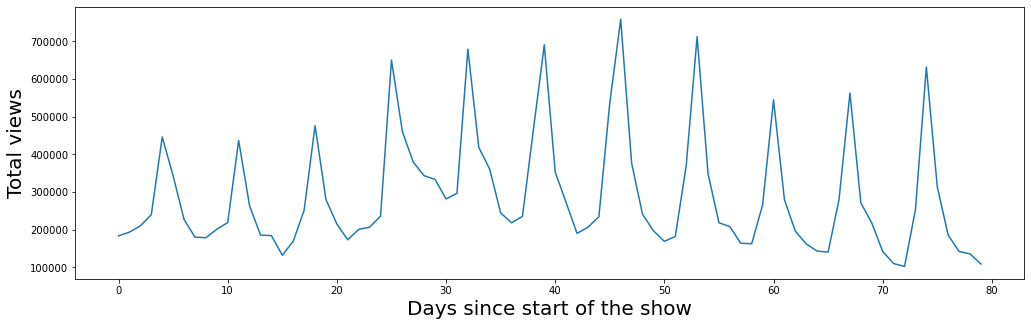

In [44]:
plt.figure(figsize=(17,5))
plt.plot(df['Views_show'])
plt.xlabel('Days since start of the show', fontsize=20)
plt.ylabel('Total views',fontsize=20)
plt.show()

Here, we can observe that there is a clear decline in the number of views after reaching a maximum of 80000 views at around 45th Day.

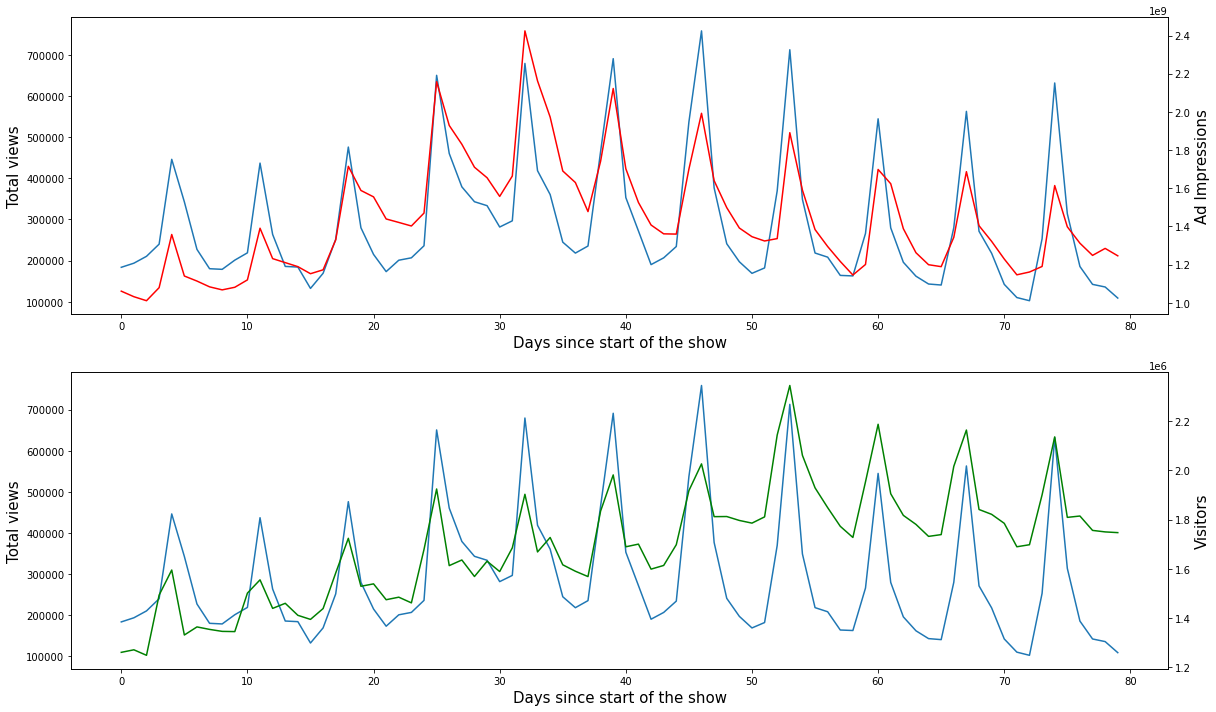

In [70]:
fig,axes=plt.subplots(figsize=(17,10),nrows=2,ncols=1)
axes[0].plot(df['Views_show'])
axes[0].set_xlabel('Days since start of the show', fontsize=15)
axes[0].set_ylabel('Total views',fontsize=15)

axes1=axes[0].twinx()
axes1.plot(df['Ad_impression'], color='r')
axes1.set_ylabel('Ad Impressions', fontsize=15)

axes[1].plot(df['Views_show'])
axes[1].set_xlabel('Days since start of the show', fontsize=15)
axes[1].set_ylabel('Total views',fontsize=15)

axes2=axes[1].twinx()
axes2.plot(df['Visitors'], color='g')
axes2.set_ylabel('Visitors', fontsize=15)

plt.tight_layout()
plt.show()


Here, we can observe that the no. of views as well as the ad impressions and the no. of visitors, all follow a periodic pattern. This is due to the factor of weekends/weekdays.

# Model Building

First, let us introduce the variable weekend in the mix.

In [125]:
from datetime import datetime

In [131]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x: x.date().strftime("%A"))


In [132]:
def weekend(day):
    if day in ['Saturday', 'Sunday']:
        return 1
    else:
        return 0

In [133]:
df['Weekend']=df['Day'].apply(lambda x: weekend(x))

In [134]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7,Day,Weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN,Wednesday,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN,Thursday,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN,Friday,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN,Saturday,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN,Sunday,1


### 1st Model

In [136]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [138]:
x=df[['Weekend','Visitors']]

y=df['Views_show']

In [147]:
x_sm=sm.add_constant(x)

model_1=sm.OLS(y,x_sm).fit()

In [152]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           2.51e-12
Time:                        16:52:05   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we can see that our first model is already a pretty solid model with 0.5 r-squared.

### Model No.2

Now, let us introduce another variable Ad impressions which we think might predict the no. of views better. 

In [150]:
x=df[['Weekend','Visitors','Ad_impression']]

y=df['Views_show']

In [151]:
x_sm=sm.add_constant(x)

model_2=sm.OLS(y,x_sm).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     100.1
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           2.47e-26
Time:                        16:51:51   Log-Likelihood:                -1005.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      76   BIC:                             2028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.534e+05   6.65e+04     -3.814      0.000   -3.86e+05   -1.21e+05
Weekend        1.517e+05   2.03e+04      7.462      0.000    1.11e+05    1.92e+05
Visitors          0.0187      0.042      0.440      0.661      -0.066       0.103
Ad_impression     0.0003   3.08e-05     10.588      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.944   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.282
Skew:                           0.429   Prob(JB):                        0.118
Kurtosis:                       3.740   Cond. No.                     1.24e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, we can observe that r-squared has significantly increased to 0.798 but the variable visitors has become insignificant.

### Model no. 3

In [165]:
x=df[['Weekend','Ad_impression']]

y=df['Views_show']

In [166]:
x_sm=sm.add_constant(x)

model_3=sm.OLS(y,x_sm).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.95e-27
Time:                        17:14:06   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.302e+05   4.01e+04     -5.744      0.000    -3.1e+05    -1.5e+05
Weekend        1.551e+05   1.87e+04      8.282      0.000    1.18e+05    1.92e+05
Ad_impression     0.0003   2.82e-05     11.736      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.941   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.423
Skew:                           0.399   Prob(JB):                        0.110
Kurtosis:                       3.831   Cond. No.                     7.52e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, one can see that r-squared has remained almost same which indicates that 'visitors' was a high-coliniear variable.

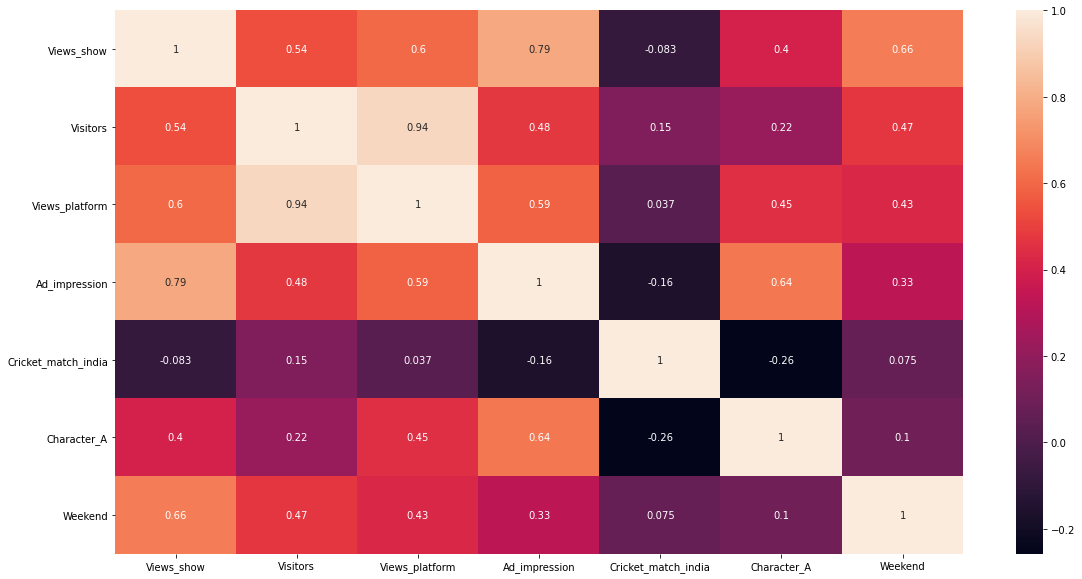

In [161]:
plt.figure(figsize=(19,10))
sns.heatmap(df.drop('Unnamed: 7',axis=1).corr(), annot=True)
plt.show()

### Model No. 4

Now, let us try adding 'views_platform' as it shows high correlation with views. Also, let us convert impressions to impressions per million to get a better sense of it's coefficent.

In [177]:
df['Ad_impression_million']=df['Ad_impression']/1000000

x=df[['Weekend','Ad_impression_million','Views_platform']]

y=df['Views_show']

In [178]:
x_sm=sm.add_constant(x)

model_4=sm.OLS(y,x_sm).fit()

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.72e-26
Time:                        17:19:59   Log-Likelihood:                -1004.7
No. Observations:                  80   AIC:                             2017.
Df Residuals:                      76   BIC:                             2027.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.804e+05   6.57e+04     -4.270      0.000   -4.11e+05    -1.5e+05
Weekend                1.493e+05   1.97e+04      7.589      0.000     1.1e+05    1.88e+05
Ad_impression_million   314.2855     33.097      9.496      0.000     248.368     380.203
Views_platform            0.0342      0.035      0.966      0.337      -0.036       0.105
==============================================================================
Omnibus:                        4.960   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.188
Skew:                           0.466   Prob(JB):                        0.123
Kurtosis:                       3.623   Cond. No.                     1.88e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we have obtained a similar result as in Model no. 2, so views to the platform is again insignificant.

### Model No. 5

Now, let us observe the effect of character A on the no. of views

In [179]:
x=df[['Weekend','Ad_impression_million','Character_A']]

y=df['Views_show']

In [180]:
x_sm=sm.add_constant(x)

model_5=sm.OLS(y,x_sm).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.05e-26
Time:                        17:20:09   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Weekend                 1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Ad_impression_million   364.4670     36.909      9.875      0.000     290.957     437.977
Character_A            -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we observe the Character A has a negative coefficient which is counter-intuitive from a business standpoint as this character is integral to the show. Hence, we cannot use this variable in our model and it must be dropped.

### Model no. 6

In [184]:
x=df[['Weekend','Visitors','Character_A']]

y=df['Views_show']

In [185]:
x_sm=sm.add_constant(x)

model_6=sm.OLS(y,x_sm).fit()

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.53e-14
Time:                        17:40:38   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we observe another model where r-squared is a decent number and all three variables are significant. Interestingly, here the presence of Character A is a positive influence on the number of views,which is as per our understanding so we can use it.

Therefore, we now have two decent models: Model No.6 and Model No.3 which both can be used to make predictions.

Before making predictions however, let us verify that the VIF vlaues in both these models are within acceptable range(<5).

### VIF Model 3

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [216]:
x_3=df[['Weekend','Ad_impression']]

In [224]:
list_v=[]
for i in range(x_3.shape[1]):
    list_v.append(variance_inflation_factor(x_3.values,i))
VIF= pd.DataFrame()
VIF['Features']=x_3.columns
VIF['Values']=list_v
VIF.sort_values(by='Values',ascending=False)

,Features,Values
0,Weekend,1.481735
1,Ad_impression,0.063597


Hence, both are in acceptable range

### VIF Model 6

In [223]:
x_6=df[['Weekend','Visitors','Character_A']]
list_f=[]
for i in range(x_6.shape[1]):
    list_f.append(variance_inflation_factor(x_6.values,i))
VIFF= pd.DataFrame()
VIFF['Features']=x_6.columns
VIFF['Values']=list_f
VIFF.sort_values(by='Values',ascending=False)

,Features,Values
1,Visitors,2.102099
2,Character_A,1.662932
0,Weekend,1.492662


Hence, both are in acceptable range

## Predictions

### Model 6

In [240]:
lm=LinearRegression()

In [241]:
lm.fit(x_6,y)

LinearRegression()

In [242]:
pred_6=lm.predict(x_6)

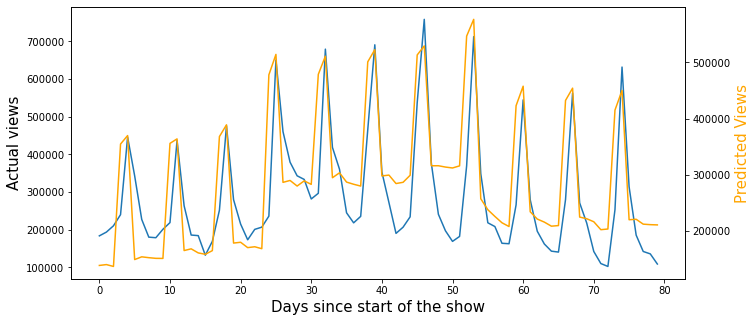

In [243]:
fig,axes=plt.subplots(figsize=(11,5))
axes.plot(df['Views_show'])
axes.set_xlabel('Days since start of the show', fontsize=15)
axes.set_ylabel('Actual views',fontsize=15)

axes1=axes.twinx()
axes1.plot(pred_6, color='orange')
axes1.set_ylabel('Predicted Views', fontsize=15, color='orange')
plt.show()

In [248]:
from sklearn.metrics import mean_squared_error, r2_score

In [250]:
print(mean_squared_error(df['Views_show'],pred_6))
print(r2_score(df['Views_show'],pred_6))

9815432480.451523
0.585873408097934


### Model 3

In [245]:
lm1=LinearRegression()
lm1.fit(x_3,y)

LinearRegression()

In [246]:
pred_3=lm1.predict(x_3)

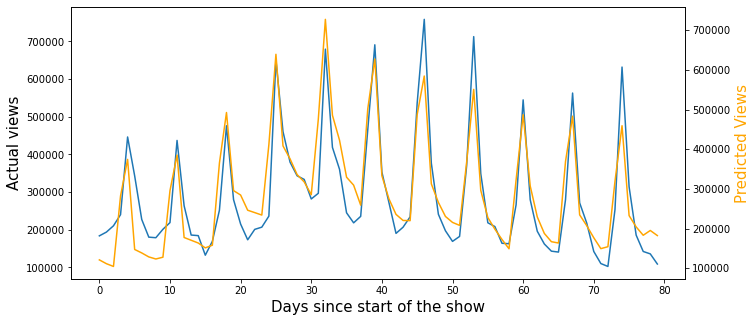

In [247]:
fig,axes=plt.subplots(figsize=(11,5))
axes.plot(df['Views_show'])
axes.set_xlabel('Days since start of the show', fontsize=15)
axes.set_ylabel('Actual views',fontsize=15)

axes1=axes.twinx()
axes1.plot(pred_3, color='orange')
axes1.set_ylabel('Predicted Views', fontsize=15, color='orange')
plt.show()

In [251]:
print(mean_squared_error(df['Views_show'],pred_3))
print(r2_score(df['Views_show'],pred_3))

4797239258.824438
0.7975978797926214


## Plotting the error terms 

### Model 6

In [252]:
error_6=df['Views_show']-pred_6

Text(0, 0.5, 'Error terms of predicted views')

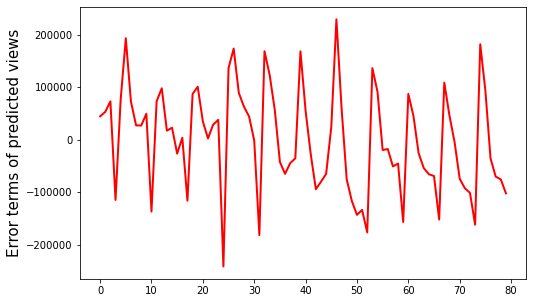

In [274]:
fig,axes=plt.subplots(figsize=(8,5))
axes.plot(error_6, linewidth=2, color='r')
axes.set_ylabel('Error terms of predicted views',fontsize=15)

### Model 3

In [255]:
error_3=df['Views_show']-pred_3

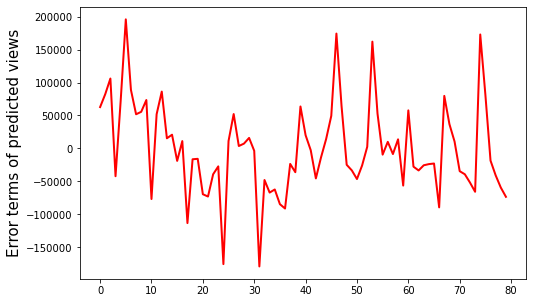

In [273]:
fig,axes=plt.subplots(figsize=(8,5))
axes.plot(error_3, linewidth=2,color='r')
axes.set_ylabel('Error terms of predicted views',fontsize=15)
plt.show()

Hence, we conclude that model no. 3 is a better overall model with higher r-square, lower mean square error and finally, the error in it's prediction is random and cannot be attributed to any missing variable(unlike in model 6).